<a href="https://colab.research.google.com/github/vodnalasricharan/HackerEarth_Will_your_Employees_leave_you_/blob/master/HE_Employee_attriation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch.nn as nn
import matplotlib.pyplot as plt
import torch
from torch import optim
import torch.nn.functional as F
from tqdm import notebook
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import copy
import pandas as pd
import math
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:

def EDA(df,test=False):
  if test:
    df['Age'].fillna(int(df['Age'].mean()),inplace=True)
    df['Pay_Scale']=df.groupby('Unit').transform(lambda x: x.fillna(int(x.mean())))
    df['VAR2'].fillna(int(df['VAR2'].mean()),inplace=True)
    df['VAR4'].fillna(int(df['VAR4'].mean()),inplace=True)
    df['Work_Life_balance'].fillna(int(df['Work_Life_balance'].mean()),inplace=True)
    df['Time_of_service'].fillna(int(df['Time_of_service'].mean()),inplace=True)
    df.replace({ 'M' : 1, 'F' : 0 }, inplace=True)
    df.replace({ 'Married' : 1, 'Single' : 0 }, inplace=True)
    labels = df['Hometown'].astype('category').cat.categories.tolist()
    replace_map_comp = {'Hometown' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    df.replace(replace_map_comp,inplace=True)
    labels = df['Unit'].astype('category').cat.categories.tolist()
    replace_map_unit = {'Unit' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    df.replace(replace_map_unit,inplace=True)
    labels = df['Decision_skill_possess'].astype('category').cat.categories.tolist()
    replace_map_dsp = {'Decision_skill_possess' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    df.replace(replace_map_dsp,inplace=True)
    labels = df['Compensation_and_Benefits'].astype('category').cat.categories.tolist()
    replace_map_cab = {'Compensation_and_Benefits' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    df.replace(replace_map_cab,inplace=True)
  else:
    df['Age'].fillna(int(df['Age'].mean()),inplace=True)
    df['Pay_Scale']=df.groupby('Unit').transform(lambda x: x.fillna(int(x.mean())))
    df['VAR2'].fillna(int(df['VAR2'].mean()),inplace=True)
    df['VAR4'].fillna(int(df['VAR4'].mean()),inplace=True)
    df['Work_Life_balance'].fillna(int(df['Work_Life_balance'].mean()),inplace=True)
    df.dropna(subset=['Time_of_service'],inplace=True)
    df.replace({ 'M' : 1, 'F' : 0 }, inplace=True)
    df.replace({ 'Married' : 1, 'Single' : 0 }, inplace=True)
    labels = df['Hometown'].astype('category').cat.categories.tolist()
    replace_map_comp = {'Hometown' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    df.replace(replace_map_comp,inplace=True)
    labels = df['Unit'].astype('category').cat.categories.tolist()
    replace_map_unit = {'Unit' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    df.replace(replace_map_unit,inplace=True)
    labels = df['Decision_skill_possess'].astype('category').cat.categories.tolist()
    replace_map_dsp = {'Decision_skill_possess' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    df.replace(replace_map_dsp,inplace=True)
    labels = df['Compensation_and_Benefits'].astype('category').cat.categories.tolist()
    replace_map_cab = {'Compensation_and_Benefits' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    df.replace(replace_map_cab,inplace=True)
  return df

In [ ]:
def get_data(data):
    # take only this specific column
    data = data[['Gender','Age', 'Relationship_Status', 'Decision_skill_possess', 'Time_of_service', 'Time_since_promotion', 'growth_rate','Post_Level','Pay_Scale','Compensation_and_Benefits','Work_Life_balance','VAR1','VAR2','VAR3','VAR4','VAR5','VAR6','VAR7']]
    
    # transform into a numpy array
    data = data.to_numpy()
    
    # normalize (make sure the data is between -1 and 1)
    for i in range(data.shape[1]):
        data[:,i] = (data[:,i] - data[:,i].mean()) / data[:,i].std()
    
    return data

In [ ]:
df=pd.read_csv('Train.csv')
df=EDA(df,test=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   int64  
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   int64  
 5   Hometown                   7000 non-null   int64  
 6   Unit                       7000 non-null   int64  
 7   Decision_skill_possess     7000 non-null   int64  
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  7000 non-null   float

In [ ]:
# lets take out first the label

y=df['Attrition_rate'].values
#print(y.shape)-->(891,)
#y_binarized is used just stratifying the data in train_test_split
#df['Survived'].value_counts(normalize=True)#ensures all 0,1's are in equal ratio
#y_binarized=df['Survived'].values
#print(y_binarized)


#loading data into x
x= get_data(df)
#print(x.shape)--->(891,6)

#splitting data for evaluation and training  x_train,y_train --->training purpose y_test,x_test--->valuation purpose
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#converting numpy arrays into tensors using pytorch
x_torch_train=torch.from_numpy(x)
y_torch_trian=torch.from_numpy(y)
x_torch_val=torch.from_numpy(x_test)
y_torch_val=torch.from_numpy(y_test)

(5250, 18)
(1750, 18)
(5250,)
(1750,)


In [ ]:
def rmse(input, target):
    sum=0
    total=0
    for i,j in zip(input,target):
      sum+=(i-j)**2
      total+=1
    rm=math.sqrt(sum/total)
    return rm

In [ ]:
class RMSELoss(torch.nn.Module):
    def __init__(self):
        super(RMSELoss,self).__init__()

    def forward(self,x,y):
        criterion = nn.MSELoss()
        loss = torch.sqrt(criterion(x, y))
        return loss

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net=nn.Sequential(
                            nn.Linear(18,512),
                            nn.LeakyReLU(),
                            nn.Linear(512,256),
                            nn.LeakyReLU(),
                            nn.Linear(256,126),
                            nn.ReLU(),
                            nn.Linear(126,1),
                            nn.Sigmoid()
                            )
  def forward(self,X):
    return self.net(X)[:,0]
  def fit(self,X,Y,optimizer=0,loss_fn=nn.MSELoss(),epochs=1000):
    loss_arr=[]
    min_loss=8
    if optimizer == 0:
      optimizer=optim.Adam(self.net.parameters(),lr=0.00125)
    for i in notebook.tqdm(range(epochs),total=epochs,unit='epoch'):
      loss_in=self(X)
      loss_label=Y
      loss=loss_fn(loss_in,loss_label)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      loss_arr.append(loss.item())
      if min_loss > loss.item():
        min_loss = loss.item()
        best_model = copy.deepcopy(self.state_dict())
    print('========================')
    print('     Min loss %0.2f' % min_loss)
    print('========================')
    self.load_state_dict(best_model)
    return loss_arr
    
  def accuracy(self,X,Y):
      correct=0
      total=0
      train=self(X)
      rmse_v=rmse(train,Y)
      train=torch.round(train * 10**2)/(10**2)
      Y=torch.round(Y * 10**2)/(10**2)
      #rmse=RMSELoss(train,Y)
      for i,j in zip(train,Y):
        total+=1
        if i==j:
          correct+=1
      accuracy=100*(correct/total)
      print('total =',total)
      print('correct predictions =',correct)
      print('accuracy =',round(accuracy,2))
      print('rmse =',rmse_v)

In [ ]:
#intializing model and moving all data to gpu
model=Network()
device=torch.device("cuda")
print(device)
x_torch_train=x_torch_train.to(device)
y_torch_trian=y_torch_trian.to(device)
x_torch_val=x_torch_val.to(device)
y_torch_val=y_torch_val.to(device)
model.to(device)

cuda


Network(
  (net): Sequential(
    (0): Linear(in_features=18, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=126, bias=True)
    (5): ReLU()
    (6): Linear(in_features=126, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
y=model(x_torch_val.float())
print(y)

tensor([0.4643, 0.4625, 0.4535,  ..., 0.4798, 0.4700, 0.4701], device='cuda:0',
       grad_fn=<SelectBackward>)



     Min loss 0.04
----------Train Accuracy---------- 
total = 7000
correct predictions = 106
accuracy = 1.51
rmse = 0.20738159083044103
----------Test  Accuracy---------- 
total = 1750
correct predictions = 21
accuracy = 1.2
rmse = 0.20852611781189886


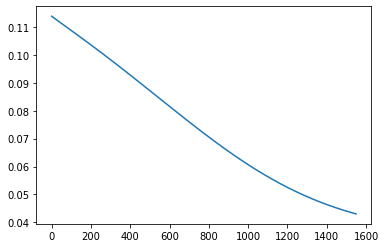

['nnmodel8.pkl']

In [ ]:
#loss_fn=nn.BCELoss()
#optimizer=optim.SGD(model.parameters(),lr=1)#---->#specifiy learning rate if you prefer using lr=learning_rate_value
optimizer=optim.Adam(model.parameters(),lr=0.00000145)
losslist=model.fit(x_torch_train.float(),y_torch_trian.float(),optimizer,epochs=1550)
print('----------Train Accuracy---------- ')
model.accuracy(x_torch_train.float(),y_torch_trian.float())
print('----------Test  Accuracy---------- ')
model.accuracy(x_torch_val.float(),y_torch_val.float())
plt.plot(losslist)
plt.show()
joblib.dump(model, 'nnmodel8.pkl')

In [ ]:
model=joblib.load('nnmodel7.pkl')
#print(netw)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred=model(x_torch_val.float())
y_pred=y_pred.cpu()
Y=y_torch_val.cpu()
Y=Y.detach().numpy()
y_pred=y_pred.detach().numpy()

In [ ]:
import math

In [ ]:
max(0,1-math.sqrt(mean_squared_error(y_pred,Y)))

0.9953568810196516

In [ ]:
test=pd.read_csv('./Test.csv')
test

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EID_22547,F,32.0,3,Single,Franklin,Sales,Directive,3.0,3,38,1,3,6.0,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4
2996,EID_10066,F,NaN,2,Single,Franklin,Marketing,Conceptual,10.0,2,57,1,4,9.0,type2,1.0,3,0.7516,0.7075,3.0,4,8,3
2997,EID_7126,F,60.0,4,Single,Lebanon,Logistics,Analytical,35.0,1,69,0,2,9.0,type3,3.0,3,-1.8176,-0.4537,NaN,4,8,4
2998,EID_4929,F,51.0,1,Married,Springfield,IT,Behavioral,23.0,1,30,0,2,6.0,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2


In [ ]:
test=pd.read_csv('./Test.csv')
test=EDA(test,test=True)
x_test=get_data(test)
#y_tst=df['Attrition_rate'].values
x_test=torch.from_numpy(x_test)
#y=torch.from_numpy(y_tst)
x_test=x_test.to(device)
#y=y.to(device)
#print('--------------train csv accuracy---------------')
#model.accuracy(test.float(),y.float())


In [ ]:
employee_ids = test['Employee_ID'].to_numpy()
print(type(employee_ids))
print(len(employee_ids))

<class 'numpy.ndarray'>
3000


In [ ]:
# net1=joblib.load('nnmodel3.pkl')
# net2=joblib.load('nnmodel4.pkl')
# net3=joblib.load('nnmodel5.pkl')
# net4=joblib.load('nnmodel6.pkl')
net5=joblib.load('nnmodel7.pkl')
# net1.to(device)
# net2.to(device)
# net3.to(device)
# net4.to(device)
net5.to(device)

Network(
  (net): Sequential(
    (0): Linear(in_features=18, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=126, bias=True)
    (5): ReLU()
    (6): Linear(in_features=126, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
# test_preds1=net1(x_test.float())
# test_preds2=net2(x_test.float())
# test_preds3=net3(x_test.float())
# test_preds4=net4(x_test.float())
test_preds5=net5(x_test.float())

In [ ]:
# test_preds1=test_preds1.tolist()
# test_preds2=test_preds2.tolist()
# test_preds3=test_preds3.tolist()
# test_preds4=test_preds4.tolist()
test_preds5=test_preds5.tolist()

In [ ]:
# final_result1 = np.array(list(map(list, zip(employee_ids,test_preds1))))
# final_result2 = np.array(list(map(list, zip(employee_ids,test_preds2))))
# final_result3 = np.array(list(map(list, zip(employee_ids,test_preds3))))
# final_result4 = np.array(list(map(list, zip(employee_ids,test_preds4))))
final_result5 = np.array(list(map(list, zip(employee_ids,test_preds5))))

In [ ]:
# arraay final_result to dataframe
# df_final1 = pd.DataFrame(data=final_result1, columns=["Employee_ID", "Attrition_rate"])
# df_final2 = pd.DataFrame(data=final_result2, columns=["Employee_ID", "Attrition_rate"])
# df_final3 = pd.DataFrame(data=final_result3, columns=["Employee_ID", "Attrition_rate"])
# df_final4 = pd.DataFrame(data=final_result4, columns=["Employee_ID", "Attrition_rate"])
df_final5 = pd.DataFrame(data=final_result5, columns=["Employee_ID", "Attrition_rate"])
# save the result
#df_final.tail()
# df_final1.to_csv('submission_1.csv', index=False)
# df_final2.to_csv('submission_2.csv', index=False)
# df_final3.to_csv('submission_3.csv', index=False)
# df_final4.to_csv('submission_4.csv', index=False)
df_final5.to_csv('submission_6.csv', index=False)

In [ ]:
from google.colab import files
# files.download('submission_1.csv')
# files.download('submission_2.csv')
# files.download('submission_3.csv')
# files.download('submission_4.csv')
files.download('submission_6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import xgboost as xgb

In [ ]:
xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
xgb.fit(x_torch_train,y_torch_train)

TypeError: ignored